# Optimum Portföy

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from pyswarm import pso

## Veri Hazırlığı ve Analizi:
### Veri Toplama: 
75 hisse senedi ve 25 fon için geçmiş fiyat verilerini ve diğer finansal verileri toplamak.
### Temizlik ve Formatlama: 
Verileri bir formata sokmak, eksik veya anormal değerlerin temizlenmesi ve veri setlerinin standardize edilmesi.
### Özellik Çıkarımı: 
Risk, getiri ve volatilite gibi özelliklerin hesaplanması.
### Korelasyon Analizi:
Varlıkların birbirleriyle olan ilişkilerini anlamak için korelasyon analizi yapmak.

In [2]:
directory = './HistoricData'
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Store daily returns and asset names
daily_returns = {}
asset_names = []

# Loop through each CSV file and populate the DataFrame and asset names list
portfolio_statistics = pd.DataFrame(columns=['Asset', 'Average Daily Return', 'Volatility'])
for file_name in csv_files:
    # Read the file
    file_path = os.path.join(directory, file_name)
    data = pd.read_csv(file_path)
    
    # Calculate daily return using 'Adj Close'
    daily_returns[file_name.replace('.csv', '')] = data['Adj Close'].pct_change().dropna()
    
    # Calculate the average daily return and volatility and add them to the DataFrame
    portfolio_statistics = portfolio_statistics.append({
        'Asset': file_name.replace('.csv', ''),  # Remove the .csv extension
        'Average Daily Return': daily_returns[file_name.replace('.csv', '')].mean(),
        'Volatility': daily_returns[file_name.replace('.csv', '')].std()
    }, ignore_index=True)
    
    # Collect the asset names
    asset_names.append(file_name.replace('.csv', ''))

# Save the portfolio statistics to a CSV file
portfolio_statistics.to_csv('./output/portfolio_statistics.csv', index=False)

# Consolidate all daily returns into a single DataFrame
all_returns = pd.DataFrame(daily_returns)

# Calculate and save the covariance matrix
covariance_matrix = all_returns.cov().to_numpy()  # Convert to NumPy array
np.savetxt('./output/covariance_matrix.csv', covariance_matrix, delimiter=',')

# Print out the portfolio statistics and covariance matrix
print("Portfolio Statistics:")
print(portfolio_statistics)
print("\nCovariance Matrix:")
print(covariance_matrix)


/var/folders/fz/1nqp83xs29d4m2bnfv_w4hjc0000gn/T/ipykernel_70828/2686389278.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolio_statistics = portfolio_statistics.append({
/var/folders/fz/1nqp83xs29d4m2bnfv_w4hjc0000gn/T/ipykernel_70828/2686389278.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolio_statistics = portfolio_statistics.append({
/var/folders/fz/1nqp83xs29d4m2bnfv_w4hjc0000gn/T/ipykernel_70828/2686389278.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolio_statistics = portfolio_statistics.append({
/var/folders/fz/1nqp83xs29d4m2bnfv_w4hjc0000gn/T/ipykernel_70828/2686389278.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Portfolio Statistics:
   Asset  Average Daily Return  Volatility
0   CSCO              0.000186    0.017703
1     NU              0.000962    0.043586
2   KOMP              0.000510    0.017955
3   GRAB             -0.000570    0.043774
4   SPYG              0.000679    0.014817
..   ...                   ...         ...
95  SPMO              0.000714    0.013926
96    MU              0.001273    0.028554
97  ASML              0.001662    0.025613
98   CRM              0.000787    0.024154
99   BCS              0.000633    0.026639

[100 rows x 3 columns]

Covariance Matrix:
[[ 3.13388768e-04  3.35071499e-05  1.73431449e-04 ...  2.15042485e-04
   1.84940564e-04  1.80814765e-04]
 [ 3.35071499e-05  1.89977862e-03  2.76905087e-05 ... -8.77160402e-06
   1.47899251e-05  5.18257672e-05]
 [ 1.73431449e-04  2.76905087e-05  3.22394701e-04 ...  3.32632972e-04
   2.70189513e-04  2.64630517e-04]
 ...
 [ 2.15042485e-04 -8.77160402e-06  3.32632972e-04 ...  6.56035066e-04
   3.43026025e-04  2.8307883

/var/folders/fz/1nqp83xs29d4m2bnfv_w4hjc0000gn/T/ipykernel_70828/2686389278.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolio_statistics = portfolio_statistics.append({
/var/folders/fz/1nqp83xs29d4m2bnfv_w4hjc0000gn/T/ipykernel_70828/2686389278.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolio_statistics = portfolio_statistics.append({
/var/folders/fz/1nqp83xs29d4m2bnfv_w4hjc0000gn/T/ipykernel_70828/2686389278.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolio_statistics = portfolio_statistics.append({
/var/folders/fz/1nqp83xs29d4m2bnfv_w4hjc0000gn/T/ipykernel_70828/2686389278.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

## Markowitz Portföy Teorisi ve İstatistiksel Analiz:
### Beklenen Getiri Hesaplama:
Her bir varlık için beklenen getirilerin hesaplanması.
### Kovaryans Matrisi: 
Varlıkların birbiriyle olan volatilite ilişkilerini ölçmek için kovaryans matrisinin oluşturulması.
### Optimizasyon: 
Beklenen getiri ve riski dikkate alarak, verilen bir risk seviyesi için maksimum getiri veya verilen bir getiri seviyesi için minimum riski sağlayacak ağırlıkları bulmak.
### Sınır Testi (Frontier Analysis):
Etkin sınırı çizmek ve Sharpe oranına göre en iyi portföyü seçmek.

Optimal Portfolio Weights: [1.60433559e-15 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.55921696e-14 1.25732137e-14 7.34285778e-03 1.78048974e-14
 0.00000000e+00 0.00000000e+00 1.10168411e-02 0.00000000e+00
 1.34832802e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.17589190e-15
 2.07456136e-15 9.93593939e-15 2.40735138e-14 0.00000000e+00
 1.43783350e-14 1.46836965e-14 1.38679631e-14 8.58585015e-04
 0.00000000e+00 0.00000000e+00 1.45206683e-14 0.00000000e+00
 8.72980269e-15 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.97829979e-02 4.80673660e-01 0.00000000e+00 8.35351941e-04
 1.80614233e-02 3.55871229e-03 0.00000000e+00 1.96198901e-03
 0.00000000e+00 2.21580565e-04 7.48467097e-03 2.66190197e-14
 0.00000000e+00 3.61280335e-03 6.18445260e-04 2.42597238e-03
 3.65537874e-16 0.00000000e+00 4.99922116e-14 1.57410599e-04
 0.00000000e+00 6.81632433e-04 2.83334145e-03 0.00000000e+00
 2.26473834e-03 1.21767133e-02 2.22678176e-14 9.48258783e-

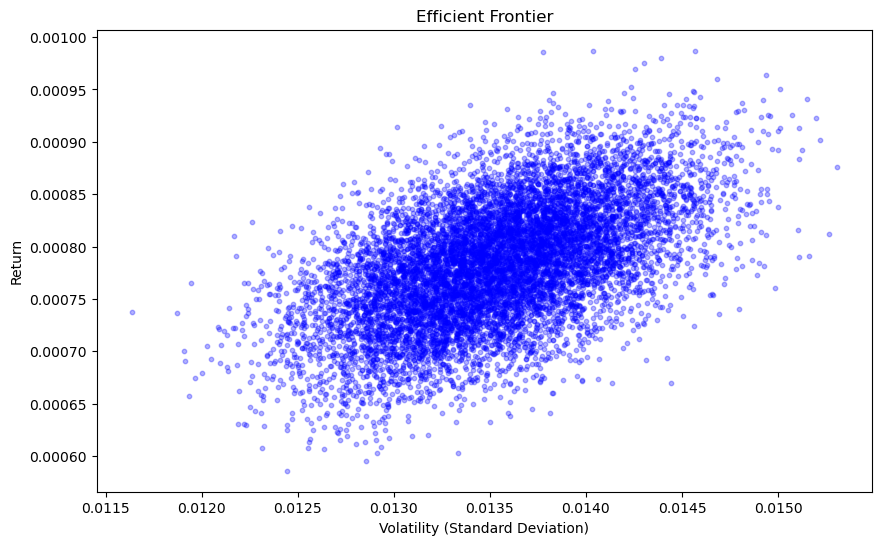

In [3]:
# Define functions for the optimization problem
def get_portfolio_variance(weights, covariance_matrix):
    return np.dot(weights.T, np.dot(covariance_matrix, weights))

def get_portfolio_return(weights, average_returns):
    return np.dot(weights, average_returns)

def constraint_sum_to_1(weights):
    return np.sum(weights) - 1

# Initial guess and bounds
num_assets = len(asset_names)
initial_guess = np.full(num_assets, 1.0 / num_assets)
bounds = tuple((0, 1) for asset in range(num_assets))

# Constraints and optimization for maximizing the Sharpe ratio
constraints = ({'type': 'eq', 'fun': constraint_sum_to_1})
average_returns = portfolio_statistics['Average Daily Return'].to_numpy()  # Convert to NumPy array
risk_free_rate = 0.05

def negative_sharpe_ratio(weights, average_returns, covariance_matrix, risk_free_rate):
    port_return = get_portfolio_return(weights, average_returns)
    port_variance = get_portfolio_variance(weights, covariance_matrix)
    return -port_return / np.sqrt(port_variance)

# Run the optimizer to find the optimal weights
result = minimize(
    lambda w: negative_sharpe_ratio(w, average_returns, covariance_matrix,risk_free_rate),
    initial_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

optimal_weights = result.x

# Normalizing optimal weights explicitly, though this should be redundant due to your constraints
optimal_weights /= np.sum(optimal_weights)

print("Optimal Portfolio Weights:", optimal_weights)

# Check if the weights sum to 1, to verify normalization if needed
if np.abs(np.sum(optimal_weights) - 1) < 1e-10:  # Using a small threshold to account for numerical precision issues
    print("Weights are normalized and sum to 1.")
else:
    print("There was an issue with the normalization of weights.")

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
# Generate random portfolios for plotting
num_portfolios = 10000
for _ in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    return_ = get_portfolio_return(weights, average_returns)
    volatility_ = np.sqrt(get_portfolio_variance(weights, covariance_matrix))
    plt.scatter(volatility_, return_, c='blue', marker='o', s=10, alpha=0.3)

plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.show()


## Particle Swarm Optimization (PSO)
### Parçacık Sürüsünü Başlatma: 
Bir parçacık sürüsü başlatın, burada her parçacık potansiyel bir çözümü temsil eder (yani, bir portföy dağılımı).
### Uygunluk Fonksiyonunu Tanımlama: 
Sharpe oranına dayalı bir uygunluk fonksiyonu tanımlayın.
### Parçacıkları Güncelleme: 
Optimal portföyü bulmak için parçacıkları birkaç iterasyon boyunca güncelleyin.

In [4]:
# Fitness function should capture necessary arguments by closure
def fitness_function_factory(average_returns, covariance_matrix, risk_free_rate):
    def sharpe_ratio(weights):
        # Ağırlıkların toplamı 1'e eşit değilse, herhangi bir ağırlık negatifse veya %20'den fazla ise ceza uygula
        if np.sum(weights) > 1.01 or np.sum(weights) < 0.99 or np.any(weights < 0) or np.any(weights > 0.2):
            return -1e10  # Uygun olmayan ağırlık kombinasyonları için düşük bir Sharpe oranı simüle et
        port_return = get_portfolio_return(weights, average_returns)
        port_variance = get_portfolio_variance(weights, covariance_matrix)
        sharpe_ratio = (port_return - risk_free_rate) / np.sqrt(port_variance)
        return sharpe_ratio  # Sharpe oranını döndür
    return sharpe_ratio

# Create the actual fitness function using the factory
fitness_function = fitness_function_factory(average_returns, covariance_matrix, risk_free_rate)

# PSO requires the bounds of the search space to be in the form of lower and upper bounds
lb = [0] * num_assets
ub = [1] * num_assets

# The constraint function must only take the particle's position vector as an argument
def constraint_eq(x):
    return np.sum(x) - 1  # The sum of weights must equal 1

# Run PSO without the 'args' parameter, since the necessary data is captured by closure
optimal_weights_pso, fopt_pso = pso(
    fitness_function, lb, ub, ieqcons=[constraint_eq], 
    swarmsize=100, maxiter=100, debug=True
)

# Normalizing optimal weights explicitly, though this should be redundant due to your constraints
optimal_weights_pso /= np.sum(optimal_weights_pso)

print("Optimal Portfolio Weights:", optimal_weights_pso)

# Check if the weights sum to 1, to verify normalization if needed
if np.abs(np.sum(optimal_weights_pso) - 1) < 1e-10:  # Using a small threshold to account for numerical precision issues
    print("Weights are normalized and sum to 1.")
else:
    print("There was an issue with the normalization of weights.")

# Print the results
print(f"Optimal Weights from PSO: {optimal_weights_pso}")
print(f"Optimized (Maximized) Sharpe Ratio from PSO: {-fopt_pso}")


Converting ieqcons to a single constraint function
Best after iteration 1: [0.38918533 0.80778147 0.89952604 0.15280391 0.67382786 0.07783237
 0.72279309 0.86376546 0.00860739 0.53352445 0.24087631 0.85793315
 0.86187297 0.43897998 0.58812605 0.97893705 0.51893407 0.70004436
 0.43249294 0.95411667 0.7108912  0.47236157 0.91963829 0.87915219
 0.25982323 0.36890702 0.42248868 0.55478987 0.57241217 0.0743947
 0.64642185 0.12033918 0.69364989 0.2461544  0.33389304 0.93122062
 0.22910132 0.30442999 0.68407547 0.84203409 0.73561663 0.20750108
 0.19007278 0.55151504 0.64399478 0.25954083 0.07119435 0.53318355
 0.31988008 0.53894987 0.10708619 0.64397155 0.1858624  0.01127983
 0.5990046  0.13438208 0.60739267 0.82817815 0.48299175 0.36010253
 0.20011701 0.5988727  0.69305293 0.04527966 0.49733072 0.99170922
 0.08934162 0.2343354  0.26488339 0.28900729 0.048925   0.7489824
 0.48404933 0.37324088 0.27944869 0.57259248 0.84201204 0.96940709
 0.1236181  0.78727369 0.12330327 0.41010822 0.27302373 

## Markowitz Portfolio Theory ve PSO karşılaştırma
### Portföy Alma: 
Hem Markowitz optimizasyonundan hem de PSO yönteminden portföyleri alma.
### Metrik Karşılaştırma: 
İki portföyün beklenen getirilerini, volatilitelerini ve Sharpe oranlarını karşılaştırma.
### En İyi Katkıda Bulunanları Seçme: 
Sharpe oranına göre daha iyi performans gösteren portföyden ağırlıklarına göre ilk 5 hisse/senedi belirleme.
### Sonuçların Birleştirilmesi: 
Sonuçları görselleştirmek için bir tabloda veya grafikte özetleme.

In [5]:
# 'optimal_weights' is the result from Markowitz Portfolio Theory
# and 'optimal_weights_pso' is from the PSO method

# Define a function to calculate the Sharpe ratio
def calculate_sharpe_ratio(weights, average_returns, covariance_matrix, risk_free_rate):
    portfolio_return = get_portfolio_return(weights, average_returns)
    portfolio_variance = get_portfolio_variance(weights, covariance_matrix)
    portfolio_std_dev = np.sqrt(portfolio_variance)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return sharpe_ratio

# Calculate Sharpe ratios for both methods
sharpe_ratio_markowitz = calculate_sharpe_ratio(optimal_weights, average_returns, covariance_matrix, risk_free_rate)
sharpe_ratio_pso = calculate_sharpe_ratio(optimal_weights_pso, average_returns, covariance_matrix, risk_free_rate)

# Compare Sharpe ratios and select the portfolio with the higher Sharpe ratio
better_portfolio = "Markowitz" if sharpe_ratio_markowitz > sharpe_ratio_pso else "PSO"
better_weights = optimal_weights if better_portfolio == "Markowitz" else optimal_weights_pso

# Identify the top 5 stocks/funds based on the weights in the better portfolio
top_contributors = np.argsort(better_weights)[-5:][::-1]  # Indices of the top 5 weights
top_stocks_funds = [asset_names[i] for i in top_contributors]  # Names of the top 5 assets

# Print the results
print(f"The better portfolio based on Sharpe ratio is: {better_portfolio}")
print(f"The top 5 stocks/funds in the better portfolio are: {top_stocks_funds}")

# Optionally, create a DataFrame for clearer presentation
comparison_df = pd.DataFrame({
    'Markowitz Weights': optimal_weights,
    'PSO Weights': optimal_weights_pso,
    'Asset Names': asset_names
})

# Sort the DataFrame based on the better portfolio's weights
comparison_df.sort_values(by=f'{better_portfolio} Weights', ascending=False, inplace=True)

# Display the DataFrame
print(comparison_df)


The better portfolio based on Sharpe ratio is: PSO
The top 5 stocks/funds in the better portfolio are: ['CLSK', 'QLD', 'BP', 'PLUG', 'BTG']
    Markowitz Weights  PSO Weights Asset Names
65       9.645786e-05     0.020029        CLSK
86       0.000000e+00     0.019938         QLD
15       0.000000e+00     0.019771          BP
77       0.000000e+00     0.019578        PLUG
19       1.175892e-15     0.019269         BTG
..                ...          ...         ...
46       7.484671e-03     0.001438        NVDA
70       2.332369e-03     0.000988        ANET
63       9.482588e-04     0.000914         TUR
53       0.000000e+00     0.000228         IWM
8        0.000000e+00     0.000174         EEM

[100 rows x 3 columns]
